In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
import ast
from collections import Counter


def get_data_from_mongodb():
    try:
        client = MongoClient("mongodb://localhost:27017/")
        db = client["OLAP"]
        collection = db["media"]
        data = list(collection.find())
        df = pd.DataFrame(data)
        if '_id' in df.columns:
            df.drop(columns=['_id'], inplace=True)
        return df
    except Exception as e:
        print(f"Gagal mengambil data dari MongoDB: {e}")
        return pd.DataFrame()
    finally:
        if client:
            client.close()

df = df = get_data_from_mongodb()
# df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# # df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [56]:
df.head()

,id,genres,network,rating,release_date,runtime,source,status,summary,title,type,original_language,popularity
0,tvmaze_1,"[Drama, Science-Fiction, Thriller]",CBS,6.5,2013-06-24,60,tvmaze,Ended,Under the Dome is the story of a small town th...,Under the Dome,tvshow,NaN,NaN
1,tvmaze_2,"[Action, Crime, Science-Fiction]",CBS,8.8,2011-09-22,60,tvmaze,Ended,You are being watched. The government has a se...,Person of Interest,tvshow,NaN,NaN
2,tvmaze_3,"[Drama, Horror, Romance]",CTV Sci-Fi Channel,7.4,2014-01-11,60,tvmaze,Ended,Based on the critically acclaimed series of no...,Bitten,tvshow,NaN,NaN
3,tvmaze_4,"[Drama, Action, Science-Fiction]",The CW,7.4,2012-10-10,60,tvmaze,Ended,"After a violent shipwreck, billionaire playboy...",Arrow,tvshow,NaN,NaN
4,tvmaze_5,"[Drama, Crime, Thriller]",HBO,8.1,2014-01-12,60,tvmaze,Running,Touch darkness and darkness touches you back. ...,True Detective,tvshow,NaN,NaN


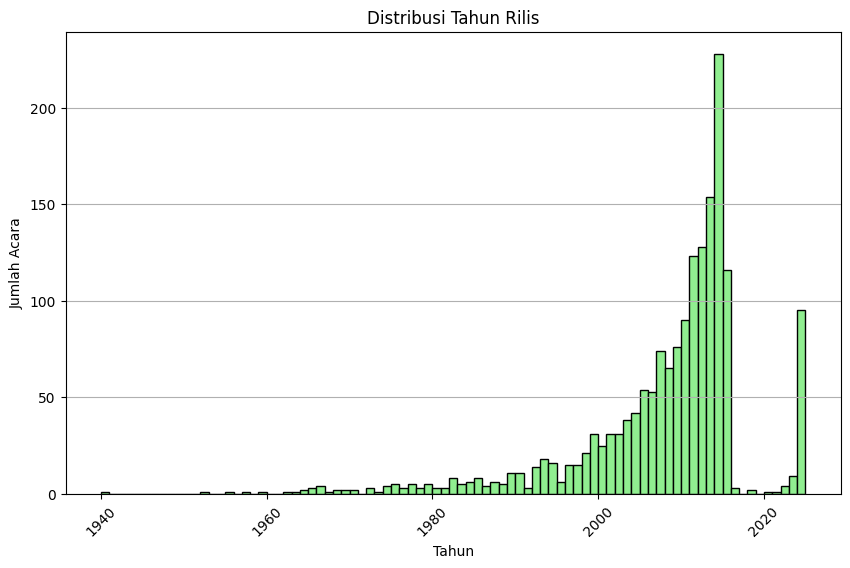

In [57]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(10,6))
plt.hist(df['release_year'].dropna(), bins=range(int(df['release_year'].min()), int(df['release_year'].max()) + 1), color='lightgreen', edgecolor='black')
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Acara')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


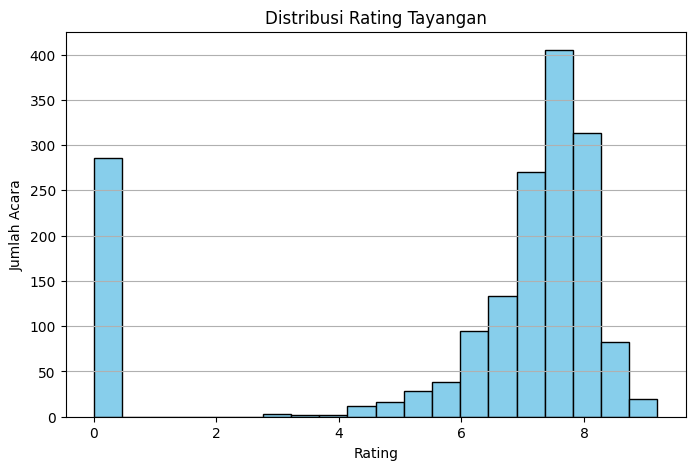

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Tayangan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Acara')
plt.grid(axis='y')
plt.show()

In [61]:
df['genres']

0       [Drama, Science-Fiction, Thriller]
1         [Action, Crime, Science-Fiction]
2                 [Drama, Horror, Romance]
3         [Drama, Action, Science-Fiction]
4                 [Drama, Crime, Thriller]
                       ...                
1700                              [28, 35]
1701                              [18, 80]
1702                       [35, 10752, 18]
1703                              [18, 53]
1704                   [14, 12, 16, 10751]
Name: genres, Length: 1705, dtype: object

In [60]:
df['genres_split']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1700   NaN
1701   NaN
1702   NaN
1703   NaN
1704   NaN
Name: genres_split, Length: 1705, dtype: float64

IndexError: index 0 is out of bounds for axis 0 with size 0

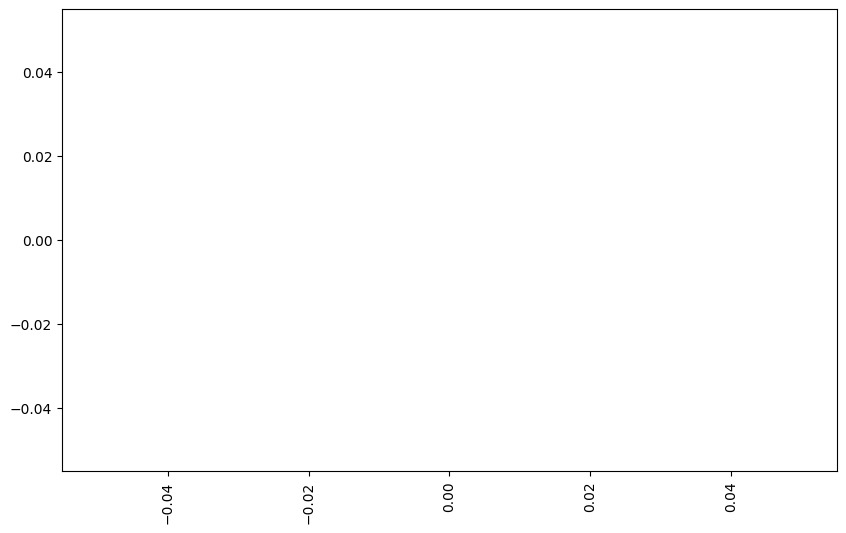

In [59]:
df['genres_split'] = df['genres'].str.split(r',\s*')  # Buat kolom baru
df_exploded = df.explode('genres_split')              # Explode kolom baru

df_exploded = df_exploded.rename(columns={'genres_split': 'genre'})

genre_avg = df_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Rating per Genre')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

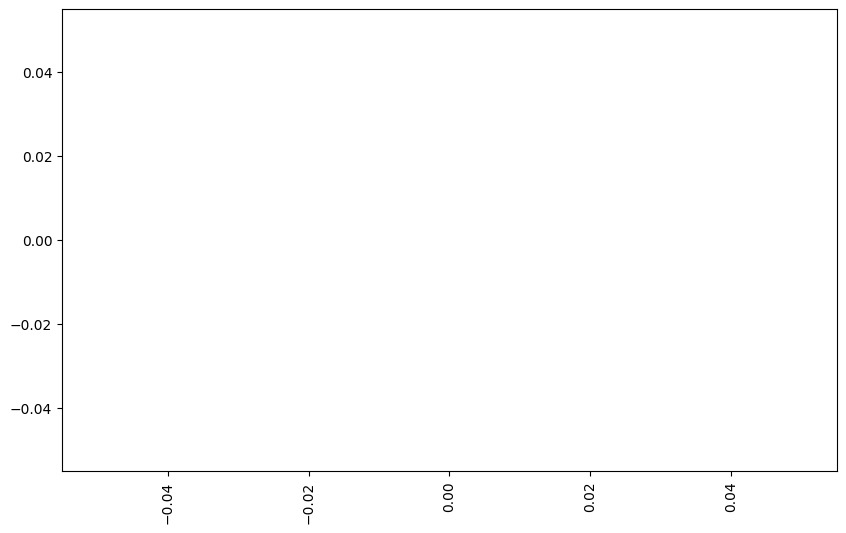

In [ ]:
genre_counts = df_exploded['genres'].value_counts()

# Plot genre terpopuler
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='salmon')
plt.title('Genre Terpopuler Berdasarkan Jumlah Film')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

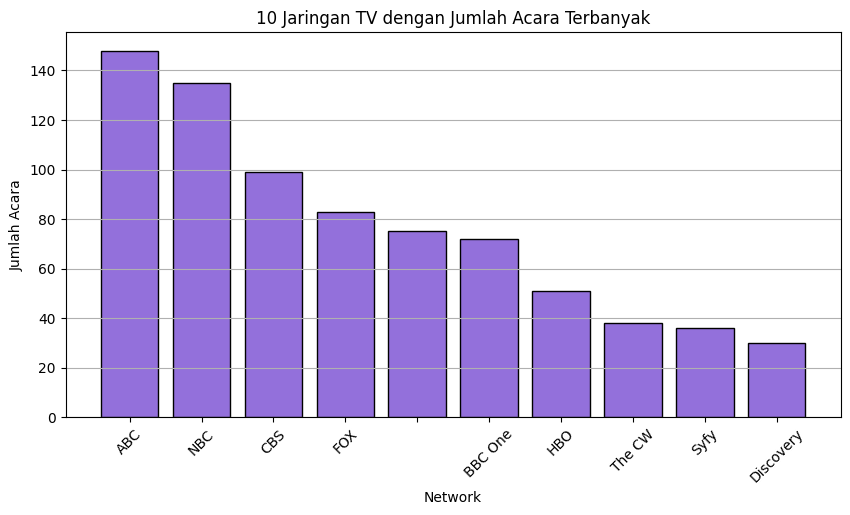

In [ ]:
top_networks = df['network'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
plt.bar(top_networks.index, top_networks.values, color='mediumpurple', edgecolor='black')
plt.title('10 Jaringan TV dengan Jumlah Acara Terbanyak')
plt.xlabel('Network')
plt.ylabel('Jumlah Acara')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

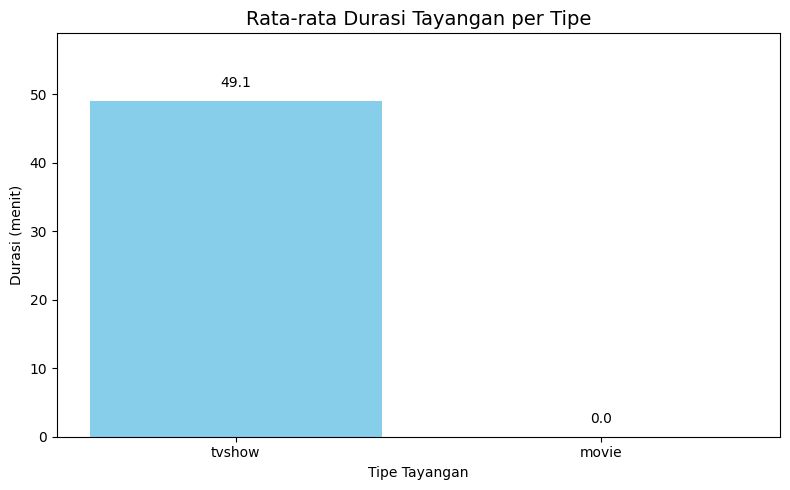

In [ ]:
avg_runtime = df.groupby('type')['runtime'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
bars = plt.bar(avg_runtime.index, avg_runtime.values, color=['skyblue', 'salmon'])
plt.title('Rata-rata Durasi Tayangan per Tipe', fontsize=14)
plt.ylabel('Durasi (menit)')
plt.xlabel('Tipe Tayangan')
plt.ylim(0, max(avg_runtime.values)*1.2)

# Tambahkan label di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{bar.get_height():.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

story telling